In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math 

In [239]:
df = pd.DataFrame({
    'x': [1,2,3,4,5,6,7,8,9],
    'g(x)': [0.03, 0.01, 0.004, 0.003, 0.002, 0.0015, 0.0018, 0.0007, 0.0005],
})

In [240]:
# função g(x) é = 1/alfa e^(usqrtx)
# para obter o de alfa e u, foi usada uma linearização de:
# Y* = ln(1/g(x)) e X* = sqrt(X)

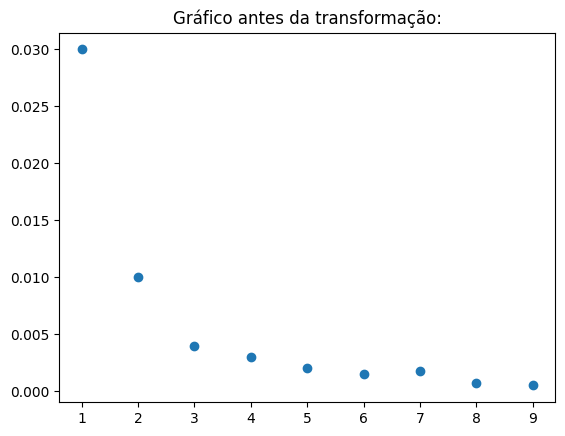

In [241]:
plt.scatter(df['x'], df['g(x)'])
plt.title('Gráfico antes da transformação:')
plt.show()

          x      g(x)
0  1.000000  3.506558
1  1.414214  4.605170
2  1.732051  5.521461
3  2.000000  5.809143
4  2.236068  6.214608
5  2.449490  6.502290
6  2.645751  6.319969
7  2.828427  7.264430
8  3.000000  7.600902


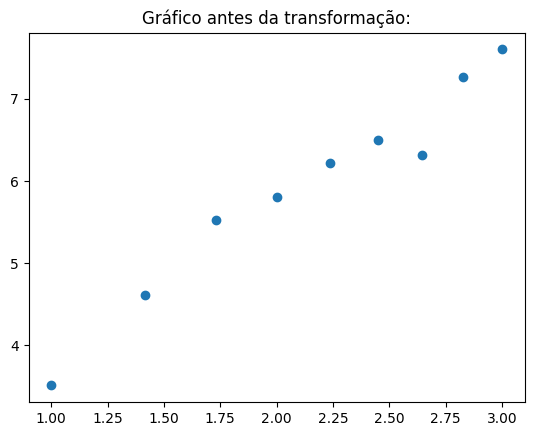

In [242]:
# transformação agora;
df_transformada = df.copy()
df_transformada['x'] = np.sqrt(df_transformada['x'])
df_transformada['g(x)'] = np.log(1/(df_transformada['g(x)']))

print(df_transformada)

plt.scatter(df_transformada['x'], df_transformada['g(x)'])
plt.title('Gráfico antes da transformação:')
plt.show()

In [243]:
linearizacao = stats.linregress(df_transformada['x'],df_transformada['g(x)'])

# como achar AX + B com essas informações.
# é necessário a agnt saber oq as informações da linearização tornam pra a e u
# como Y* é ln1/gx, e x* é sqrtx, podemos concluir que:
# Y* = u.x* + ln(a) que é o resultado da transformação algebrica
# dessa forma, podemos saber que: exp(intercept) = alfa e 
# u = a*X

alfa = np.exp(linearizacao.intercept)
mu = linearizacao.slope

<function matplotlib.pyplot.show(close=None, block=None)>

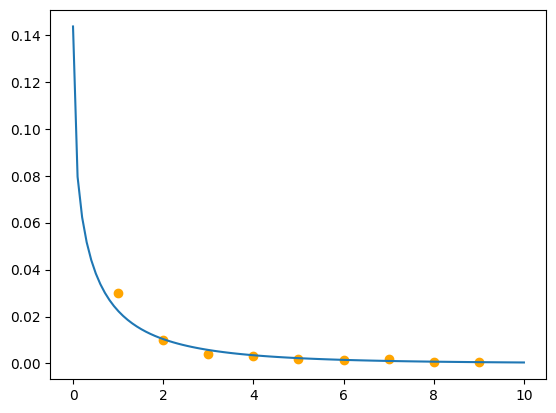

In [244]:
# agora vamos plotar o gráfio de g(x) e comparar com o scatter
xp = np.linspace(0, 10, 100)

def g(x):
    return 1/(alfa * np.exp(mu*np.sqrt(x)))

plt.plot(xp, g(xp))
plt.scatter(df.x, df['g(x)'], color= 'orange')
plt.show

## Agora, um desafio com um DataSet de verdade


In [245]:
df_carros_eletricos = pd.read_excel('datasets/carros_elétricos.xlsx')
df_carros_eletricos.head()

,Marca,Modelo,Aceleração,Autonomia,Eficiência,Carga rápida,Tração,Tipo do Plug,Modelo.1,Assentos,Preço em Euro
0,Tesla,Model 3 Long Range Dual Motor,4.6,450,161,940 km/h,All Wheel Drive,Type 2 CCS,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,270,167,250 km/h,Rear Wheel Drive,Type 2 CCS,Hatchback,5,30000
2,Polestar,2,4.7,400,181,620 km/h,All Wheel Drive,Type 2 CCS,Liftback,5,56440
3,BMW,iX3,6.8,360,206,560 km/h,Rear Wheel Drive,Type 2 CCS,SUV,5,68040
4,Honda,e,9.5,170,168,190 km/h,Rear Wheel Drive,Type 2 CCS,Hatchback,4,32997


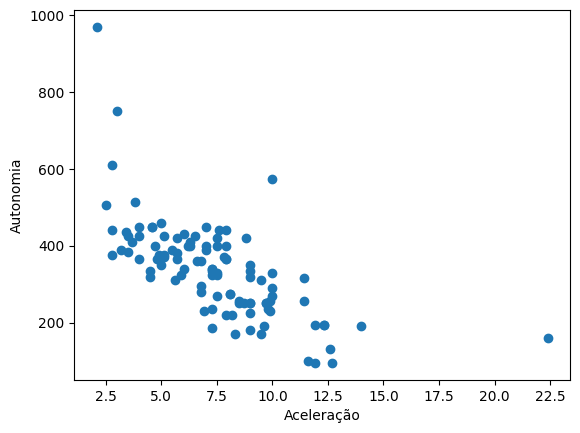

In [246]:
plt.scatter(df_carros_eletricos.Aceleração, df_carros_eletricos.Autonomia)
plt.xlabel("Aceleração")
plt.ylabel("Autonomia")
plt.show()

In [247]:
lin = stats.linregress(df_carros_eletricos.Aceleração, df_carros_eletricos.Autonomia)


0.4584129463890401
O modelo de regressão não é linear o suficiente. É necessário realizar transformações para isso.


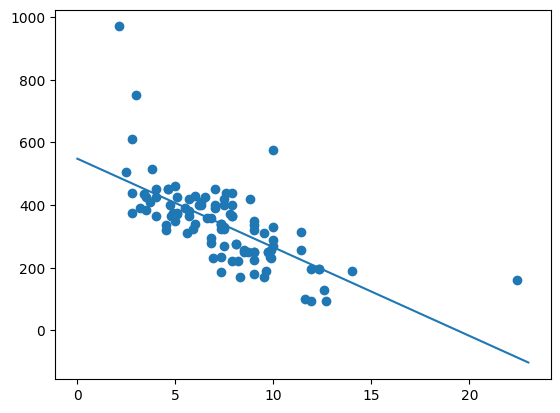

In [248]:
# agora vamos plotar o gráfio de g(x) e comparar com o scatter
xp = np.linspace(0, 23, 250)

def g(x):
    return lin.intercept + x*lin.slope 

plt.plot(xp, g(xp))
plt.scatter(df_carros_eletricos.Aceleração, df_carros_eletricos.Autonomia)
plt.show
print(lin.rvalue**2)
print("O modelo de regressão não é linear o suficiente. É necessário realizar transformações para isso.")


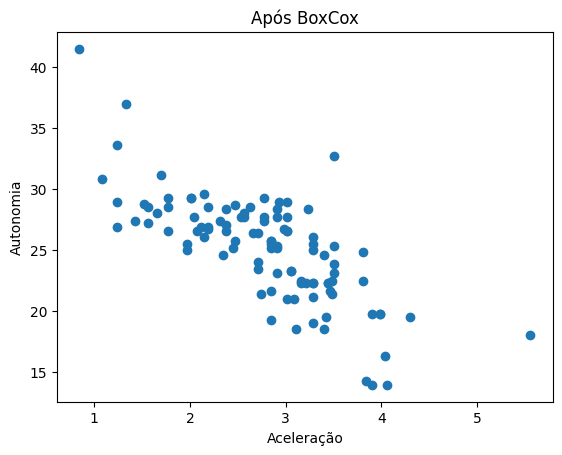

In [249]:
df_y, lambdaY = stats.boxcox(df_carros_eletricos.Autonomia)
df_x, lambdaX = stats.boxcox(df_carros_eletricos.Aceleração)
plt.scatter(df_x, df_y)
plt.xlabel("Aceleração")
plt.ylabel("Autonomia")
plt.title("Após BoxCox")
plt.show()

lin_bx = stats.linregress(df_x, df_y)


0.5490458559041609
A linha de regressão agora é estatisticamente válida, com um R² acima de 0.5


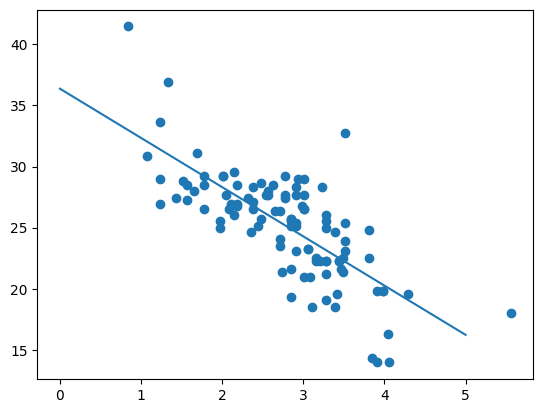

In [250]:
# agora vamos plotar o gráfio de g(x) e comparar com o scatter
xp = np.linspace(0, 5, 250)

def g(x):
    return lin_bx.intercept + x*lin_bx.slope 

plt.plot(xp, g(xp))
plt.scatter(df_x, df_y)
plt.show
print(lin_bx.rvalue**2)
print("A linha de regressão agora é estatisticamente válida, com um R² acima de 0.5")


#### Agora é necessário analisar as variáveis. 
No caso, agora vamos validar a normalidade da variável aceleração.


Statistics:  0.9273011873591565 | p_value:  2.7075577857566387e-05
A variável provavelmente não segue uma distribuição normal.


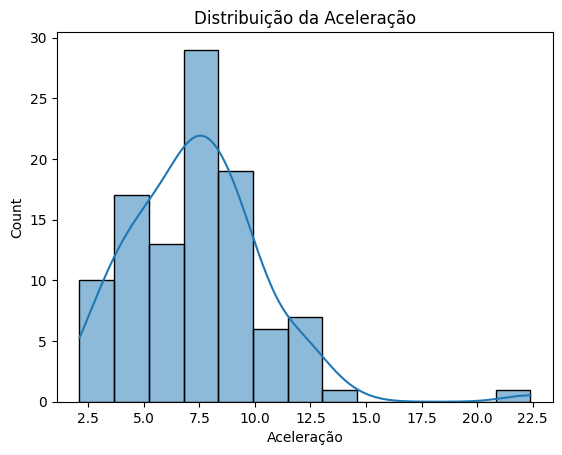

Statistics:  0.9034811187568579 | p_value:  1.5305164328248486e-06
A variável provavelmente não segue uma distribuição normal.


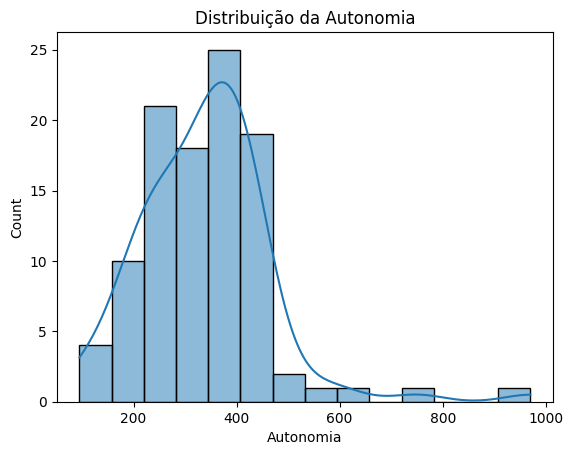

In [251]:
def checkShapiro(df):
    statistics, p_value = stats.shapiro(df)
    print("Statistics: ", statistics, "| p_value: ", p_value)
    alpha = 0.05

    #Print resultado
    if p_value > alpha:
        print("A variável provavelmente segue uma distribuição normal.")
    else:
        print("A variável provavelmente não segue uma distribuição normal.")

sns.histplot(df_carros_eletricos.Aceleração, kde=True)
checkShapiro(df_carros_eletricos.Aceleração)
plt.title("Distribuição da Aceleração")
plt.show()

sns.histplot(df_carros_eletricos.Autonomia, kde=True)
checkShapiro(df_carros_eletricos.Autonomia)
plt.title("Distribuição da Autonomia")
plt.show()

# só pela curva da pra ver que a distribuição não é normal.

Statistics:  0.9806043035827471 | p_value:  0.1354202431691015
A variável provavelmente segue uma distribuição normal.


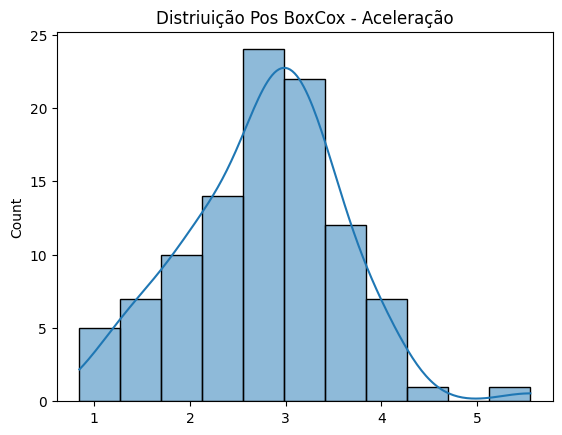

Statistics:  0.9806043035827471 | p_value:  0.1354202431691015
A variável provavelmente segue uma distribuição normal.


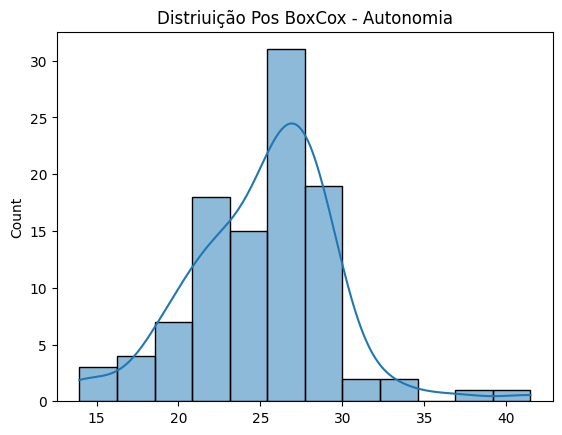

In [252]:
sns.histplot(df_x, kde=True)
plt.title("Distriuição Pos BoxCox - Aceleração")
checkShapiro(df_x)
plt.show()
#só pelo gráfico, é possível notar a normalização dos dados
sns.histplot(df_y, kde=True)
plt.title("Distriuição Pos BoxCox - Autonomia")
checkShapiro(df_x)
plt.show()